<h4>EDA - Exploratory Data Analysis</h4>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

df = pd.read_csv("/home/felipe/Desktop/python/projects/kaggle/Hotel booking demand/hotel_bookings.csv", sep=",") # use sep="," for coma separation. 
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.fillna(0, inplace=True)

<h4>Where do the Guests come from?</h4>

In [4]:
guest_country = df[df["is_canceled"] == 0]["country"].value_counts().reset_index()
guest_country.columns = ["country", "number of guests"]
total_guests = guest_country["number of guests"].sum()
guest_country["guests in %"] = round(guest_country["number of guests"] / total_guests * 100, 2)
print(guest_country)

# Plot map guest
map_guest = px.choropleth(guest_country, locations=guest_country["country"], color=guest_country["number of guests"])
map_guest.show()

    country  number of guests  guests in %
0       PRT             21071        28.03
1       GBR              9676        12.87
2       FRA              8481        11.28
3       ESP              6391         8.50
4       DEU              6069         8.07
..      ...               ...          ...
161     SLE                 1         0.00
162     FRO                 1         0.00
163     AIA                 1         0.00
164     MRT                 1         0.00
165     MDG                 1         0.00

[166 rows x 3 columns]


<h4>Room Price Analysis</h4>

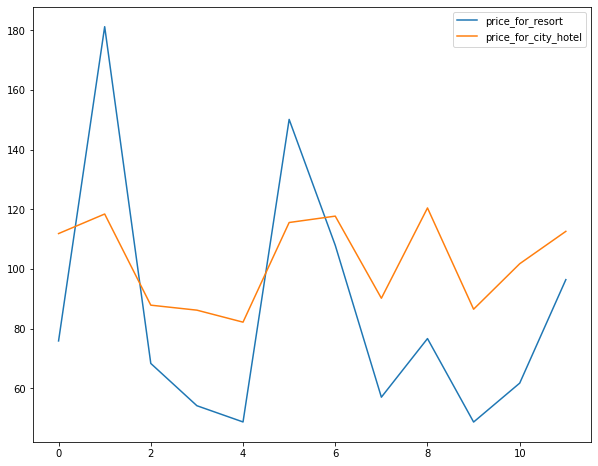

In [5]:
resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

resort_hotel = resort.groupby(["arrival_date_month"])["adr"].mean().reset_index()
city_hotel = city.groupby(["arrival_date_month"])["adr"].mean().reset_index()

# Merge
final = resort_hotel.merge(city_hotel, on="arrival_date_month")
final.columns = ["month", "price_for_resort", "price_for_city_hotel"]
final

plt.figure(figsize=(10, 8))
plt.plot(final["price_for_resort"], label="price_for_resort")
plt.plot(final["price_for_city_hotel"], label="price_for_city_hotel")
plt.legend()
plt.show()

<h3>How Long Do Guest Stay?</h3>
<h3>How Long Do people stay at the hotels?</h3>

In [6]:
not_canceled = df[df.loc[:, "is_canceled"] == 0]
not_canceled["total_nights"] = df.loc[:,"stays_in_weekend_nights"] + df.loc[:,"stays_in_week_nights"]
not_canceled.head()

/tmp/ipykernel_33347/387483918.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [7]:
hotel_stay = not_canceled.groupby(["total_nights", "hotel"]).agg("count").reset_index()
hotel_stay

,total_nights,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,City Hotel,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308,308
1,0,Resort Hotel,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372,372
2,1,City Hotel,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169,9169
3,1,Resort Hotel,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580
4,2,City Hotel,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992,10992
5,2,Resort Hotel,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488,4488
6,3,City Hotel,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895,11895
7,3,Resort Hotel,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830,3830
8,4,City Hotel,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704,7704
9,4,Resort Hotel,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321,3321


<h3>Which market-segment has higher bookings?</h3>

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


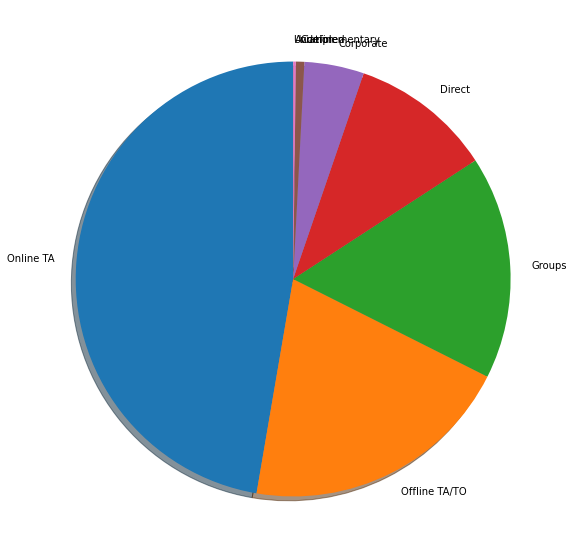

In [8]:
# Bookings by market segment
segments = df["market_segment"].value_counts()
print(segments)

plt.figure(figsize=(18, 10))
plt.pie(segments, labels=segments.index, shadow=True, startangle=90)
plt.show()

<h3>How many bookings were cancelled?</h3>

In [9]:
canceled = df["is_canceled"] == 1
print(f"Total Booking canceled: {canceled.sum()}")

resort_canceled = df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum()
city_canceled = df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum()
print(f"Total Resort canceled: {resort_canceled}")
print(f"Total City canceled: {city_canceled}")

Total Booking canceled: 44224
Total Resort canceled: 11122
Total City canceled: 33102


<h3>Which month have the highest number of cancelations?</h3>

                    is_canceled_city  is_canceled_resort
arrival_date_month                                      
April                           3609                7480
August                          4894                8983
December                        2648                4132
February                        3103                4965
January                         2193                3736
July                            4573                8088
June                            3045                7894
March                           3336                6458
May                             3559                8232
November                        2437                4357
October                         3555                7605
September                       3108                7400


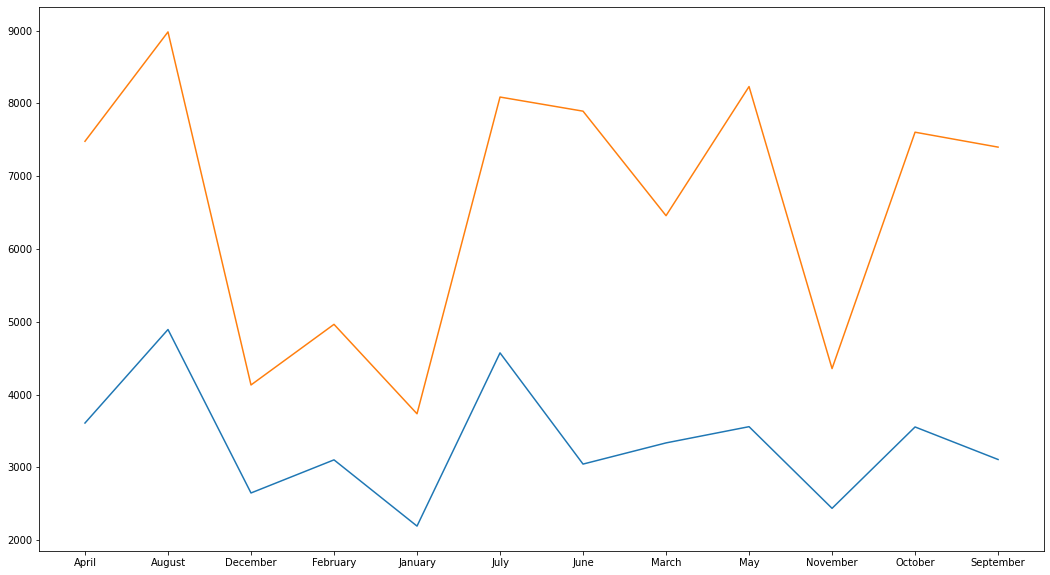

In [27]:
resort_canceled_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].count()
city_canceled_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].count()

full_cancel = pd.concat([resort_canceled_month, city_canceled_month], axis=1)
full_cancel.columns = {"is_canceled_resort", "is_canceled_city"}
print(full_cancel)


plt.figure(figsize=(18, 10))
plt.plot(full_cancel)
plt.show()

<h3>Describe dataset</h3>

Sum quantity of missing values:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                   

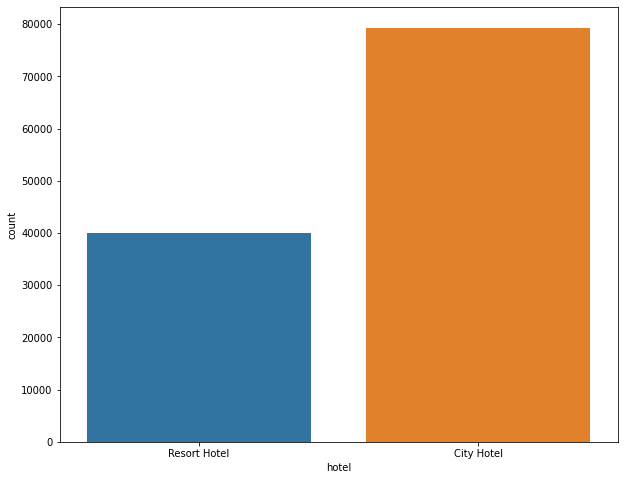


is_canceled
0              75166
1              44224
dtype: int64


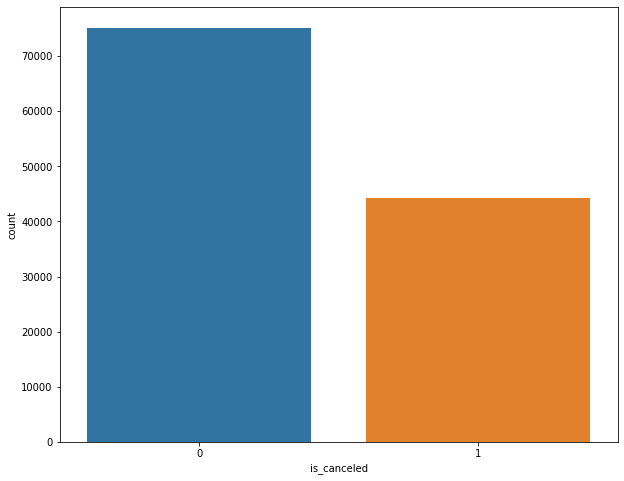


lead_time
0            6345
1            3460
2            2069
3            1816
4            1715
             ... 
424             1
435             1
709             1
458             1
737             1
Length: 479, dtype: int64


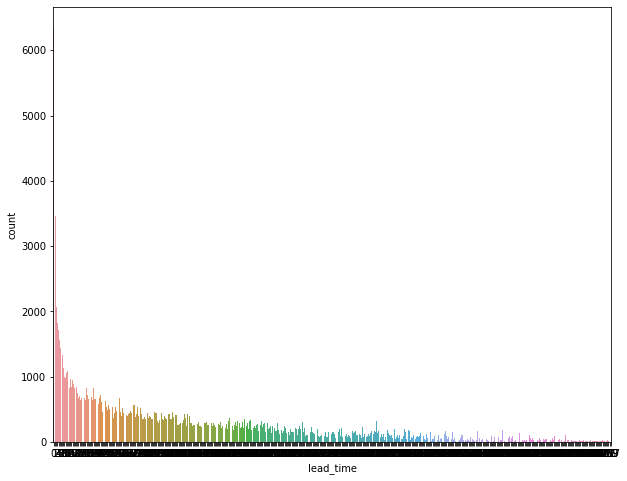


arrival_date_year
2016                 56707
2017                 40687
2015                 21996
dtype: int64


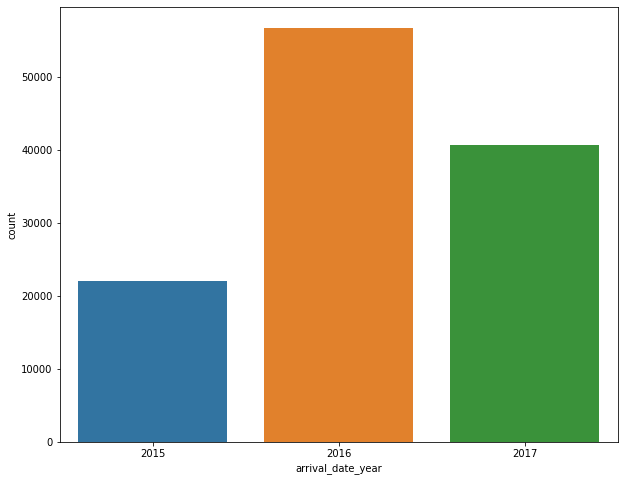


arrival_date_month
August                13877
July                  12661
May                   11791
October               11160
April                 11089
June                  10939
September             10508
March                  9794
February               8068
November               6794
December               6780
January                5929
dtype: int64


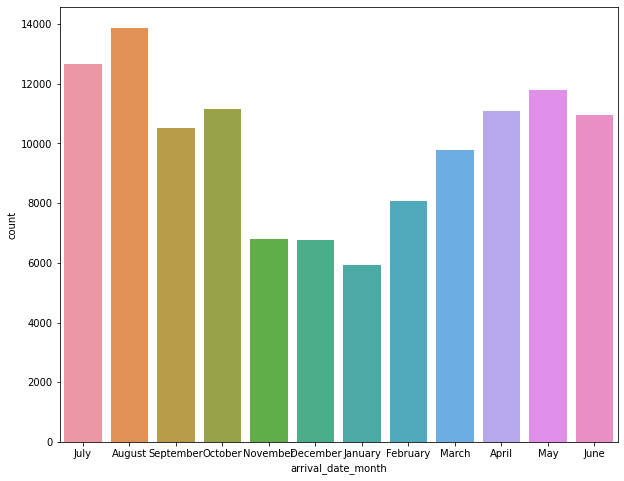


arrival_date_week_number
33                          3580
30                          3087
32                          3045
34                          3040
18                          2926
21                          2854
28                          2853
17                          2805
20                          2785
29                          2763
42                          2756
31                          2741
41                          2699
15                          2689
27                          2664
25                          2663
38                          2661
23                          2621
35                          2593
39                          2581
22                          2546
24                          2498
13                          2416
16                          2405
19                          2402
40                          2397
26                          2391
43                          2352
44                          2272
14               

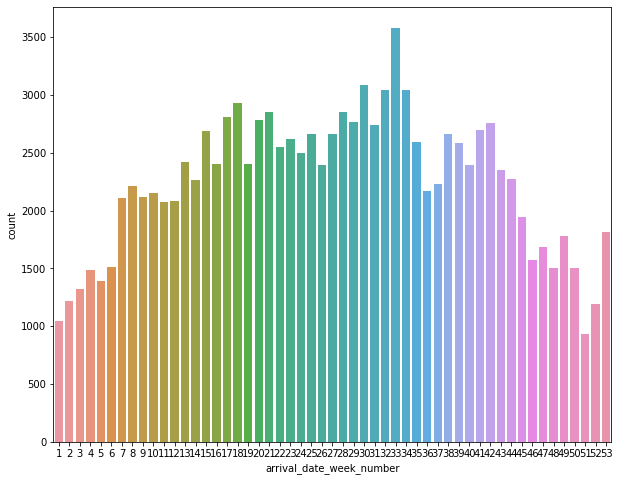


arrival_date_day_of_month
17                           4406
5                            4317
15                           4196
25                           4160
26                           4147
9                            4096
12                           4087
16                           4078
2                            4055
19                           4052
20                           4032
18                           4002
24                           3993
28                           3946
8                            3921
3                            3855
30                           3853
6                            3833
14                           3819
27                           3802
21                           3767
4                            3763
13                           3745
7                            3665
1                            3626
23                           3616
11                           3599
22                           3596
29                   

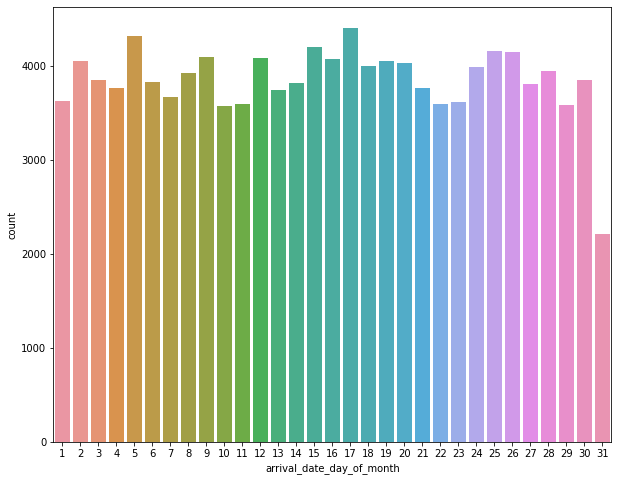


stays_in_weekend_nights
0                          51998
2                          33308
1                          30626
4                           1855
3                           1259
6                            153
5                             79
8                             60
7                             19
9                             11
10                             7
12                             5
13                             3
16                             3
14                             2
18                             1
19                             1
dtype: int64


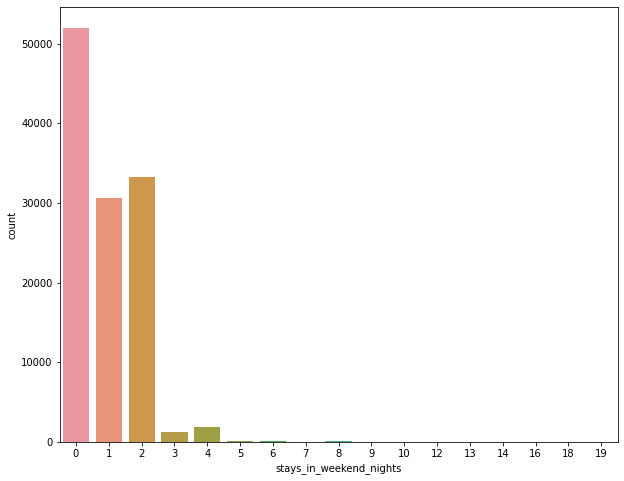


stays_in_week_nights
2                       33684
1                       30310
3                       22258
5                       11077
4                        9563
0                        7645
6                        1499
10                       1036
7                        1029
8                         656
9                         231
15                         85
11                         56
19                         44
12                         42
20                         41
14                         35
13                         27
16                         16
21                         15
22                          7
18                          6
25                          6
30                          5
17                          4
24                          3
40                          2
42                          1
26                          1
32                          1
33                          1
34                          1
35                

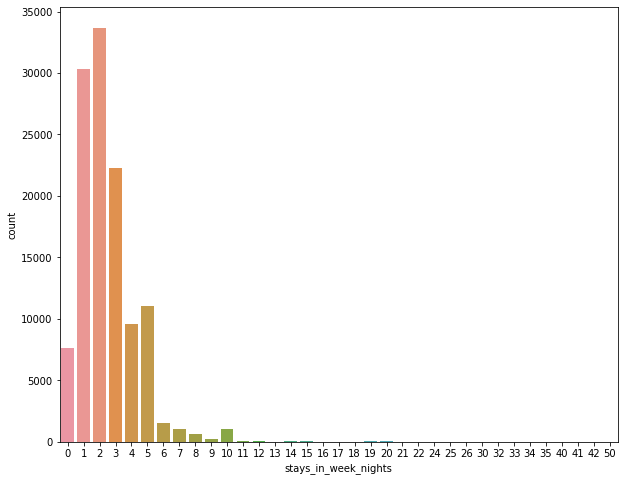


adults
2         89680
1         23027
3          6202
0           403
4            62
26            5
27            2
20            2
5             2
55            1
50            1
40            1
10            1
6             1
dtype: int64


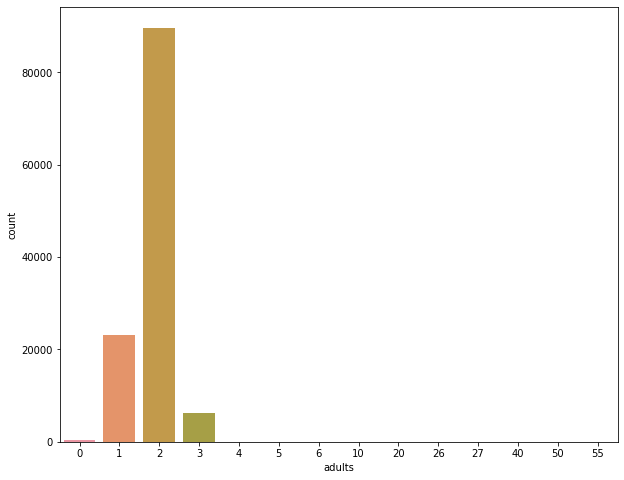


children
0.0         110800
1.0           4861
2.0           3652
3.0             76
10.0             1
dtype: int64


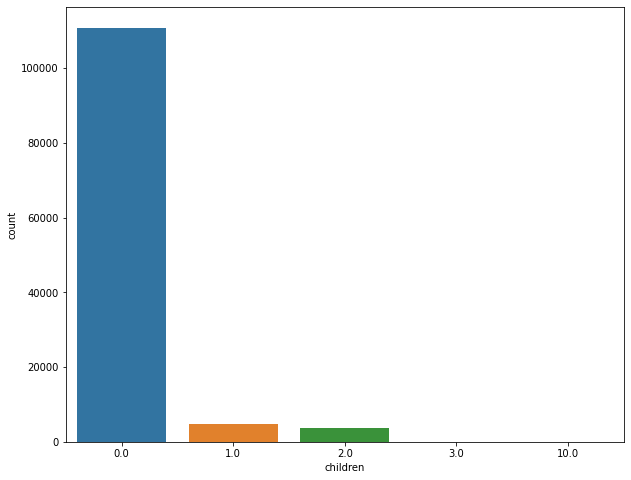


babies
0         118473
1            900
2             15
10             1
9              1
dtype: int64


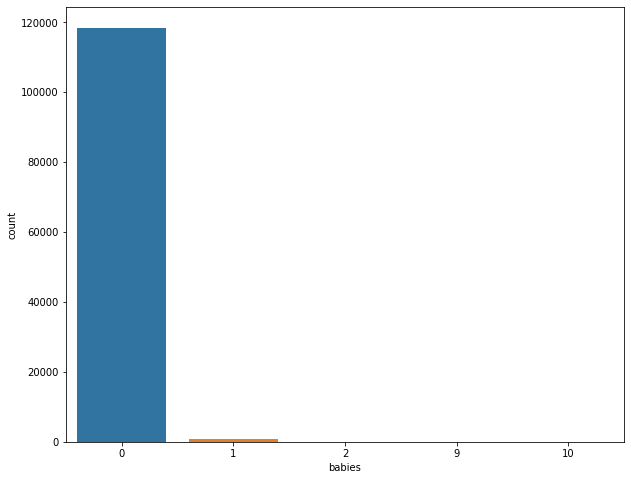


meal     
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
dtype: int64


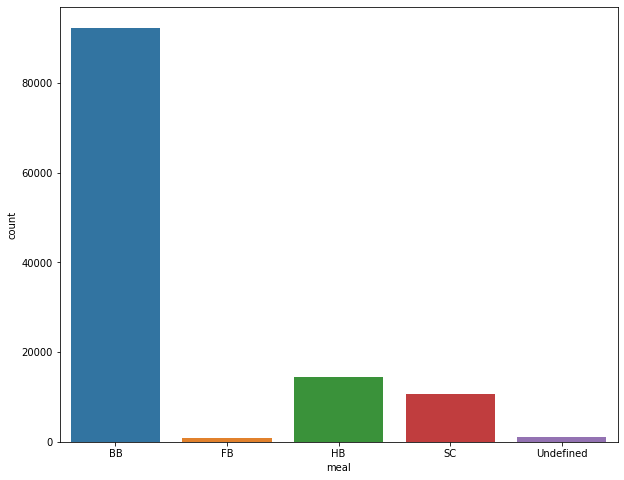


country
PRT        48590
GBR        12129
FRA        10415
ESP         8568
DEU         7287
           ...  
PYF            1
NAM            1
PLW            1
GUY            1
NPL            1
Length: 178, dtype: int64


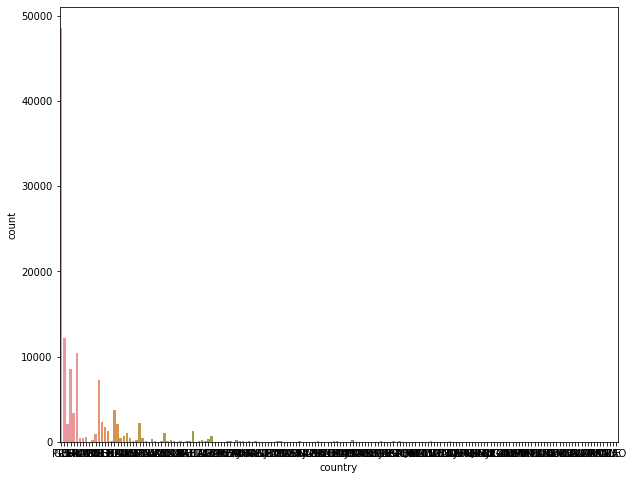


market_segment
Online TA         56477
Offline TA/TO     24219
Groups            19811
Direct            12606
Corporate          5295
Complementary       743
Aviation            237
Undefined             2
dtype: int64


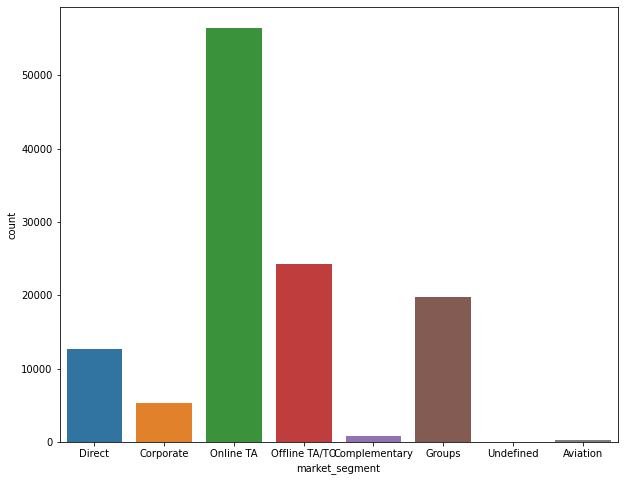


distribution_channel
TA/TO                   97870
Direct                  14645
Corporate                6677
GDS                       193
Undefined                   5
dtype: int64


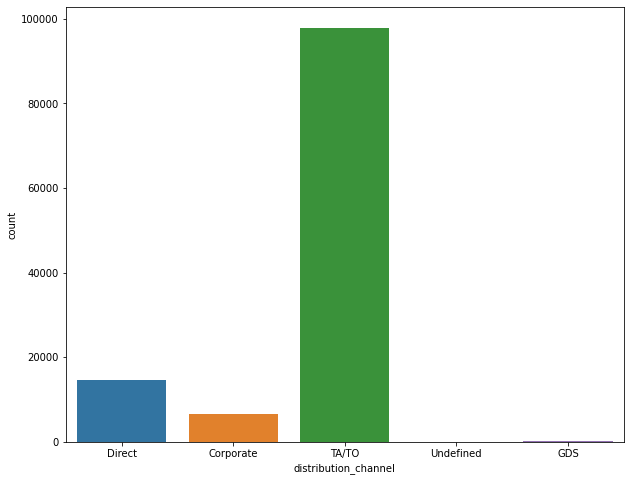


is_repeated_guest
0                    115580
1                      3810
dtype: int64


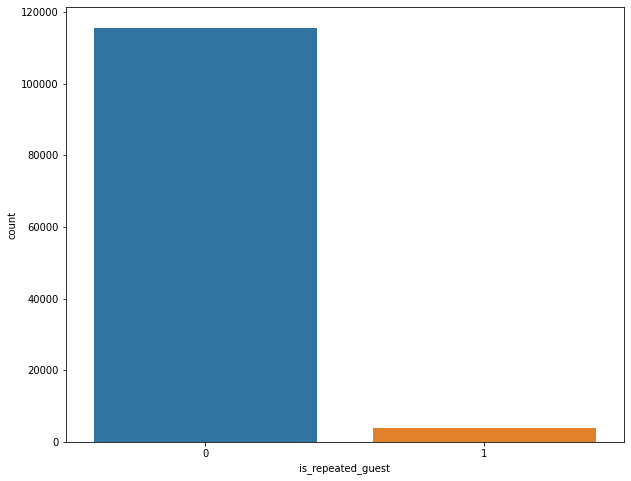


previous_cancellations
0                         112906
1                           6051
2                            116
3                             65
24                            48
11                            35
4                             31
26                            26
25                            25
6                             22
19                            19
5                             19
14                            14
13                            12
21                             1
dtype: int64


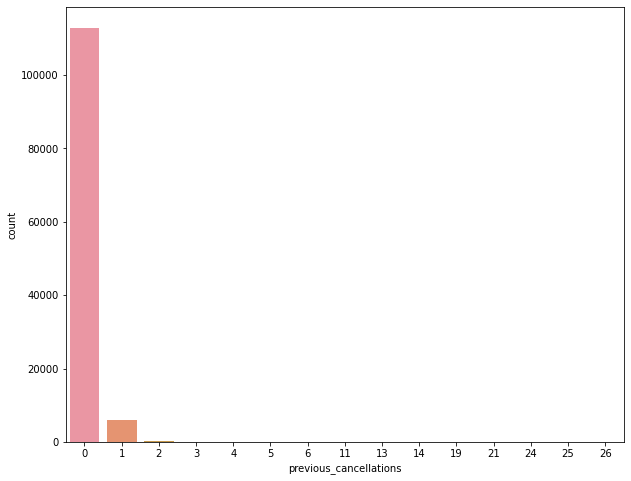


previous_bookings_not_canceled
0                                 115770
1                                   1542
2                                    580
3                                    333
4                                    229
5                                    181
6                                    115
7                                     88
8                                     70
9                                     60
10                                    53
11                                    43
12                                    37
13                                    30
14                                    28
15                                    21
16                                    20
25                                    17
17                                    16
18                                    14
19                                    13
20                                    12
21                                    12
22                       

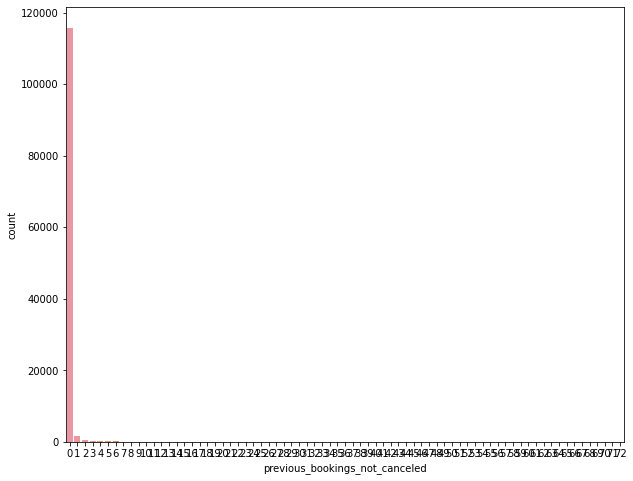


reserved_room_type
A                     85994
D                     19201
E                      6535
F                      2897
G                      2094
B                      1118
C                       932
H                       601
P                        12
L                         6
dtype: int64


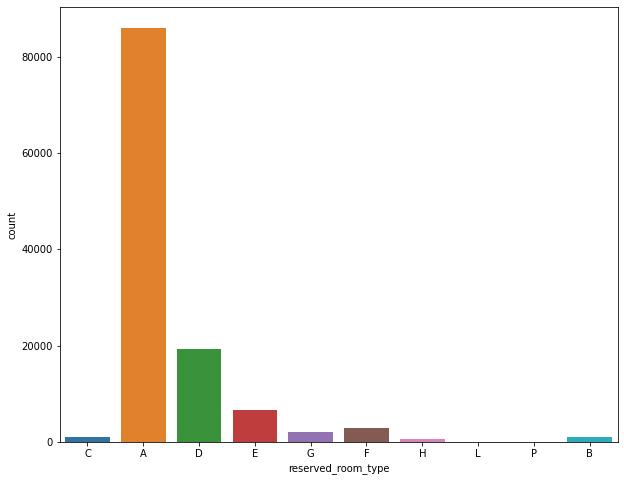


assigned_room_type
A                     74053
D                     25322
E                      7806
F                      3751
G                      2553
C                      2375
B                      2163
H                       712
I                       363
K                       279
P                        12
L                         1
dtype: int64


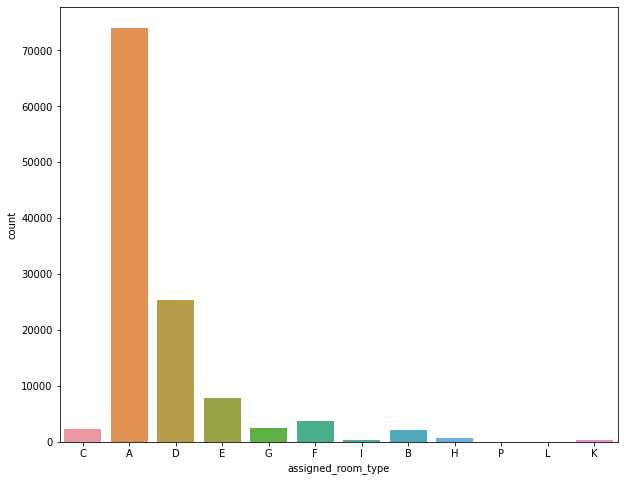


booking_changes
0                  101314
1                   12701
2                    3805
3                     927
4                     376
5                     118
6                      63
7                      31
8                      17
9                       8
10                      6
13                      5
14                      5
15                      3
11                      2
12                      2
16                      2
17                      2
20                      1
18                      1
21                      1
dtype: int64


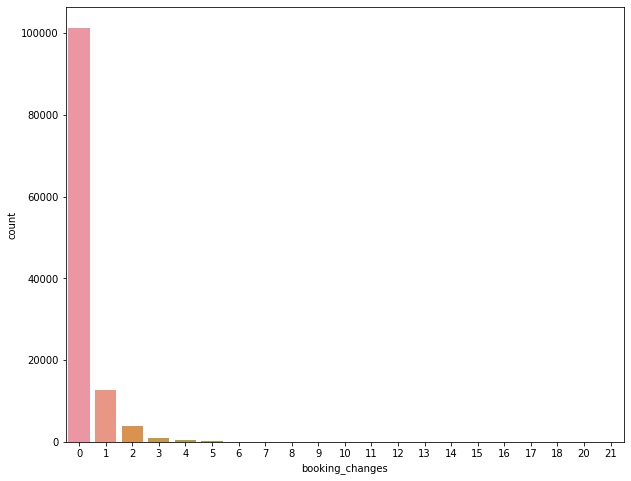


deposit_type
No Deposit      104641
Non Refund       14587
Refundable         162
dtype: int64


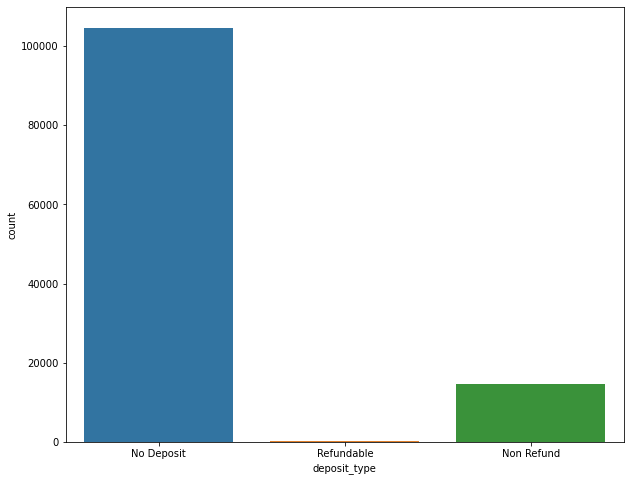


agent
9.0      31961
0.0      16340
240.0    13922
1.0       7191
14.0      3640
         ...  
450.0        1
451.0        1
453.0        1
144.0        1
278.0        1
Length: 334, dtype: int64


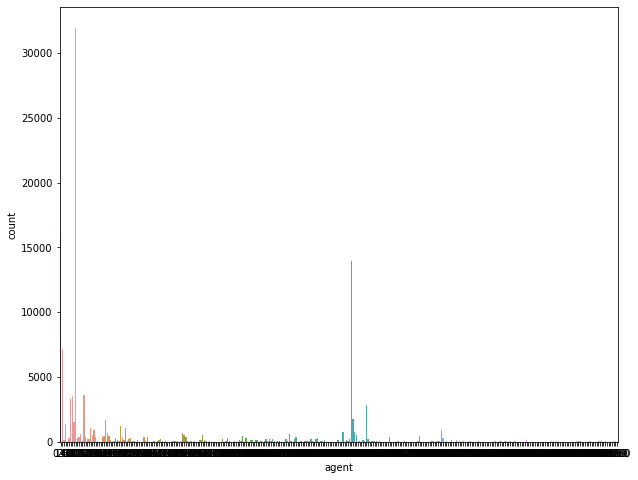


company
0.0        112593
40.0          927
223.0         784
67.0          267
45.0          250
            ...  
386.0           1
376.0           1
373.0           1
126.0           1
288.0           1
Length: 353, dtype: int64


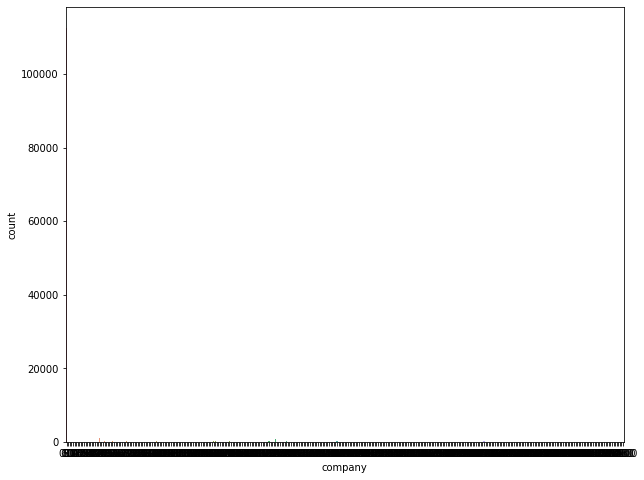


days_in_waiting_list
0                       115692
39                         227
58                         164
44                         141
31                         127
                         ...  
193                          1
36                           1
37                           1
175                          1
167                          1
Length: 128, dtype: int64


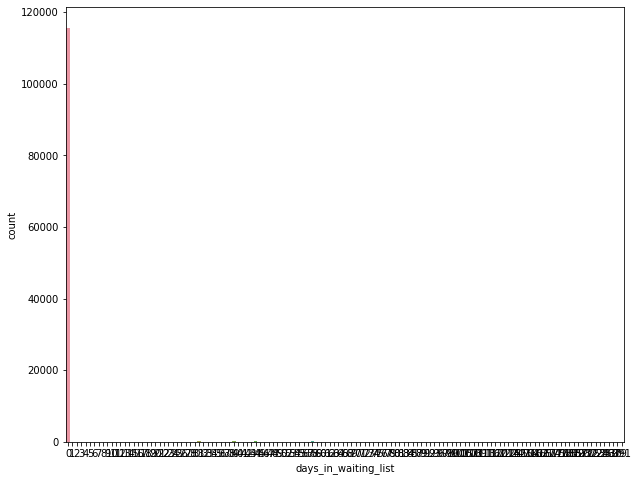


customer_type  
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
dtype: int64


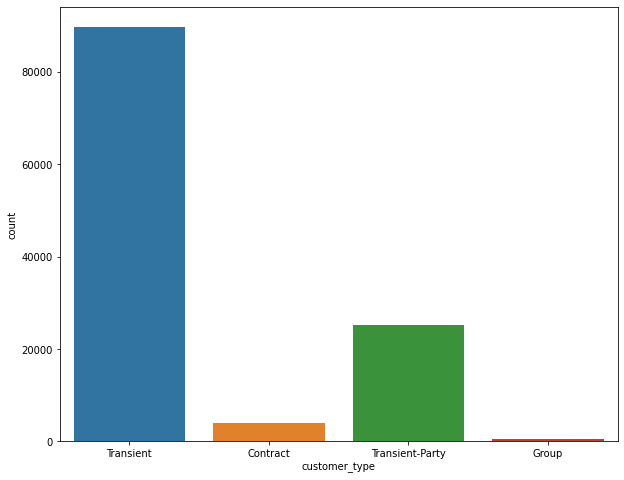


adr    
 62.00     3754
 75.00     2715
 90.00     2473
 65.00     2418
 0.00      1959
           ... 
 132.39       1
 132.40       1
 132.45       1
 132.55       1
-6.38         1
Length: 8879, dtype: int64


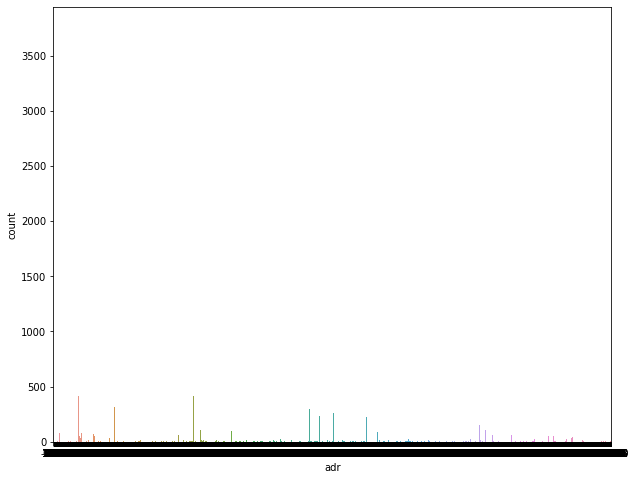


required_car_parking_spaces
0                              111974
1                                7383
2                                  28
3                                   3
8                                   2
dtype: int64


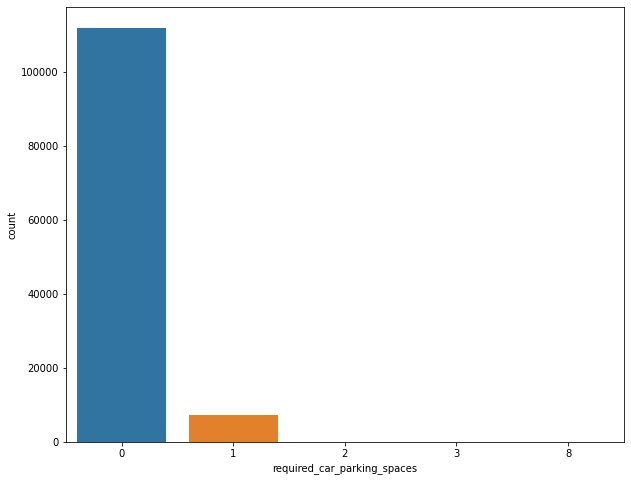


total_of_special_requests
0                            70318
1                            33226
2                            12969
3                             2497
4                              340
5                               40
dtype: int64


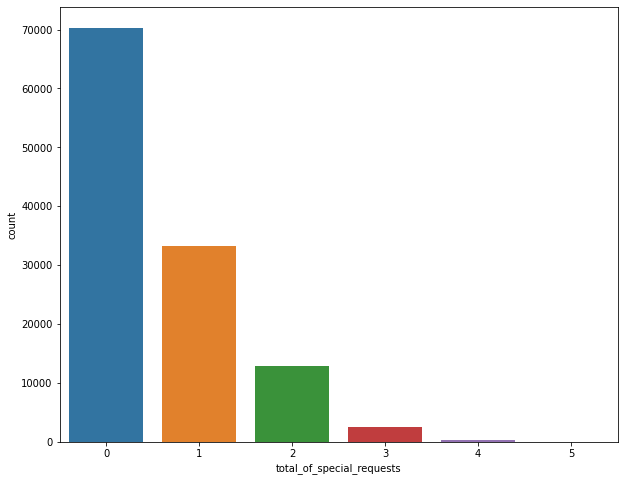


reservation_status
Check-Out             75166
Canceled              43017
No-Show                1207
dtype: int64


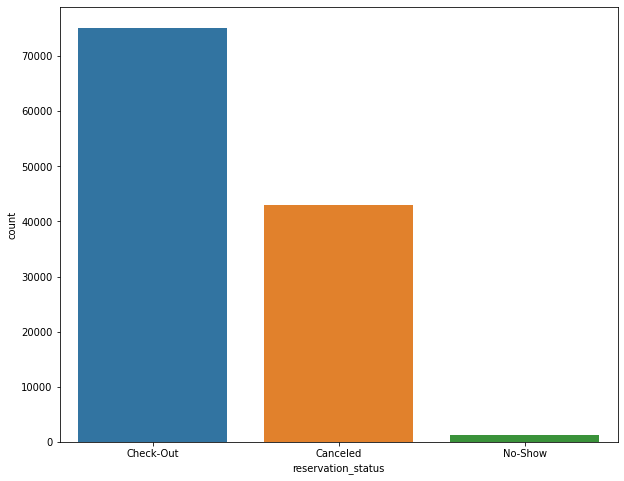


reservation_status_date
2015-10-21                 1461
2015-07-06                  805
2016-11-25                  790
2015-01-01                  763
2016-01-18                  625
                           ... 
2015-03-28                    1
2015-03-05                    1
2015-03-13                    1
2015-03-10                    1
2015-03-18                    1
Length: 926, dtype: int64


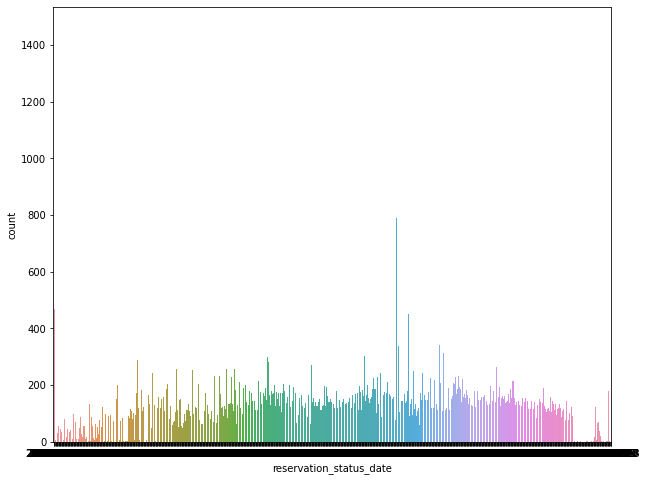

Describe:          is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000  

In [11]:
print(f"Sum quantity of missing values:\n{df.isnull().sum()}")
print(f"Columns: {df.columns}")
print(f"Count number of distinct elements:\n{df.nunique()}")
for column in df.columns:
    print(f"\n{df[{column}].value_counts()}")
    plt.figure(figsize=(10,8))
    sns.countplot(data=df, x=column)
    plt.show()

print(f"Describe: {df.describe()}")
print(f"Shape: {df.shape}")